In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import optimize
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.facecolor'] = 'w'
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.top'] = False
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['ytick.left'] = True
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['legend.facecolor'] = [1,1,1]
mpl.rcParams['legend.framealpha'] = 0.75
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['axes.edgecolor'] = 'k'

# Some explanation

This is some explanation of the analysis. In this example we are ploting the following relationship,

$$ y = a^{bx}, $$

where $y$ is the quality of the paper, $x$ is the time invested in making it reproducible. 

In [2]:
time = pd.Series([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], name='time/hr')

In [3]:
quality = pd.Series([1.0, 1.9, 3.6, 6.9, 13.1, 25.0, 47.6, 90.6, 172.5, 328.3, 625.0], name='quality')

In [4]:
data = pd.DataFrame({'time': time, 'quality': quality})

In [5]:
data

,time,quality
0,0,1.0
1,10,1.9
2,20,3.6
3,30,6.9
4,40,13.1
5,50,25.0
6,60,47.6
7,70,90.6
8,80,172.5
9,90,328.3


It is possible to put as much information as you want in.

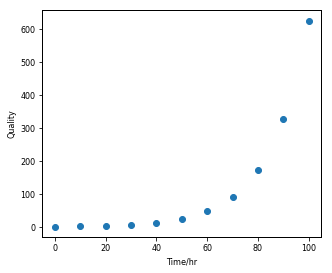

In [6]:
plt.figure(figsize=(5, 25/6))
ax = plt.subplot()
data.plot('time', marker='o', ls='', ax=ax, legend=False)
plt.xlabel('Time/hr')
plt.ylabel('Quality')
plt.savefig('figure1.pdf')

For example here you could talk about why this relationship was chosen.

In [7]:
def relationship(x, a, b):
    return a ** (b * x)

In [8]:
popt, pcov = optimize.curve_fit(relationship, data['time'], data['quality'])

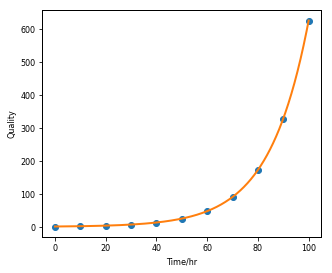

In [9]:
plt.figure(figsize=(5, 25/6))
ax = plt.subplot()
data.plot('time', marker='o', ls='', ax=ax, legend=False)
big_x = np.linspace(0, 100, 1000)
plt.plot(big_x, relationship(big_x, popt[0], popt[1]))
plt.xlabel('Time/hr')
plt.ylabel('Quality')
plt.savefig('figure2.pdf')

In [10]:
perr = np.sqrt(np.diag(pcov))

In [11]:
for i in range(0, len(popt)):
    f_out = open('number{}.txt'.format(i+1), 'w')
    popt_out = '{:.3f}'.format(popt[i])
    perr_out = '{:.3f}'.format(perr[i])
    f_out.write('${:.3f}\pm{:.3f}$'.format(popt[i], perr[i]))
    f_out.close()